In [1]:
# STEP 1. Install all required libraries at once
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

In [3]:
# initializing plotting setting for better imaging part
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 4) # define the size of my figure window
plt.rcParams['font.size'] = 12 # define the font size used in my figure

In [7]:
# STEP 2. Read the signal
# define filepaths to read the data
# Option 1: when data is in the same folder where i am saving my jupyter note book
# Option 2: Use full path, data can be save anywhere in your laptop
opt2 = pd.read_csv(r"C:\Users\mrpap\OneDrive\Desktop\Raw dataset per subject\2.csv")# use r so that python does not treat\n as new line
# Need to find the place where my jupyter works
import os
os.getcwd() # this will help to find the current directory
#opt1 = pd.read_csv(r"C:\Users\niral\2.csv")
opt1=pd.read_csv(r"C:\Users\mrpap\OneDrive\Desktop\Raw dataset per subject\2.csv")

In [8]:
# Inspect
print(opt1.head())
print(opt1.columns)
print(opt1.shape)

   Red (a.u)  Infra Red (a.u)  Gender  Age  Hemoglobin (g/dL)
0     111133           107976  Female   22               12.2
1     111199           108052  Female   22               12.2
2     111361           108097  Female   22               12.2
3     111431           108046  Female   22               12.2
4     111020           107750  Female   22               12.2
Index(['Red (a.u)', 'Infra Red (a.u)', 'Gender', 'Age', 'Hemoglobin (g/dL)'], dtype='str')
(249, 5)


In [9]:
# Extract PPG of red LED
ppg_red = opt1['Red (a.u)'].values
#ppg_ir=opt1['Infra Red (a.u)'].values
#ppg_raw=opt1[['Red (a.u)','Infra Red (a.u)']].values

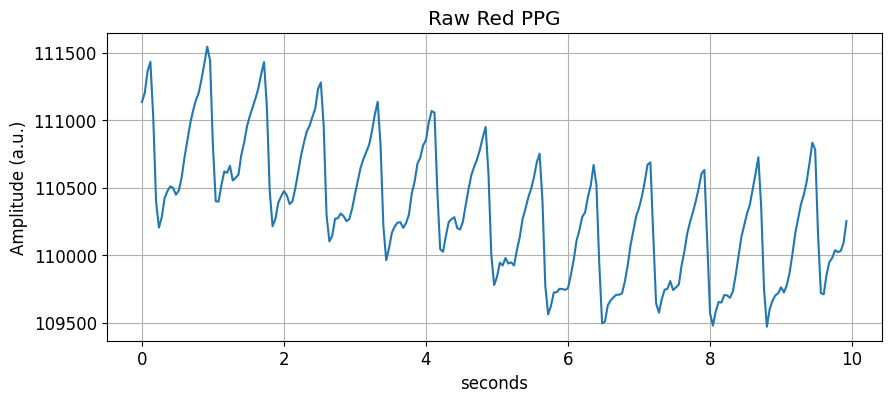

In [10]:
# plot and check the signals
fs = 25  # sampling frequency (Hz)
t = np.arange(len(ppg_red)) / fs
plt.plot(t,ppg_red)
plt.title("Raw Red PPG")
plt.xlabel("seconds")
plt.ylabel("Amplitude (a.u.)")
plt.grid(True)
plt.show()

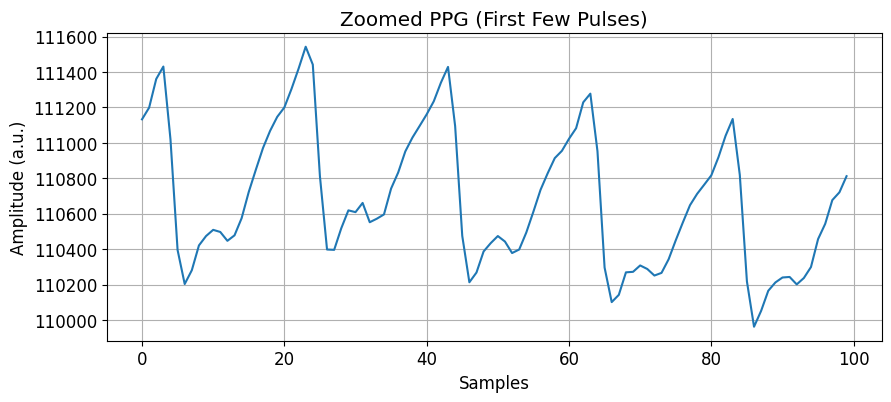

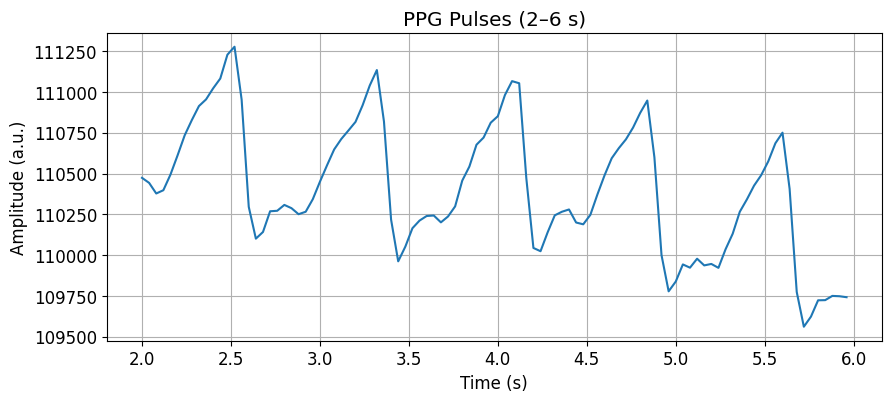

In [11]:
# Lets learn to observe few pulses from signal
# Option 1: plotting few samples
N = 100  # ~4 pulses at 25 Hz

plt.plot(ppg_red[:N])
plt.title("Zoomed PPG (First Few Pulses)")
plt.xlabel("Samples")
plt.ylabel("Amplitude (a.u.)")
plt.grid(True)
plt.show()

# Option 2: define the range in time for plotting
start_time = 2   # seconds
end_time   = 6   # seconds

start_idx = int(start_time * fs) # convert the time into samples, must be integer values
end_idx   = int(end_time * fs)

plt.plot(t[start_idx:end_idx], ppg_red[start_idx:end_idx])
plt.title("PPG Pulses (2–6 s)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (a.u.)")
plt.grid(True)
plt.show()

In [12]:
## STEP 3. Start preprocessing in three steps:
# Step1. Demeaning
# Step2. Detrending
# Step3. Filtering

# Step 3.1- Demeaning
#ppg_ir_raw = ppg_ir.copy() # Never overwrite raw data.
ppg_red_raw = ppg_red.copy()
#mean_ppg_ir = np.mean(ppg_ir_raw) # Compute mean values
mean_ppg_red = np.mean(ppg_red_raw)
print("Mean (DC component of Red ):", mean_ppg_red) # This number represents baseline optical absorption
#ppg_ir_demean = ppg_ir_raw - mean_ppg_ir # Now demean the signal
ppg_red_demean = ppg_red_raw - mean_ppg_red

# Lets do sanity check
#print("Mean IR after demeaning:", np.mean(ppg_ir_demean))
print("Mean RED after demeaning:", np.mean(ppg_red_demean))

Mean (DC component of Red ): 110339.96787148595
Mean RED after demeaning: -3.623368450436726e-12


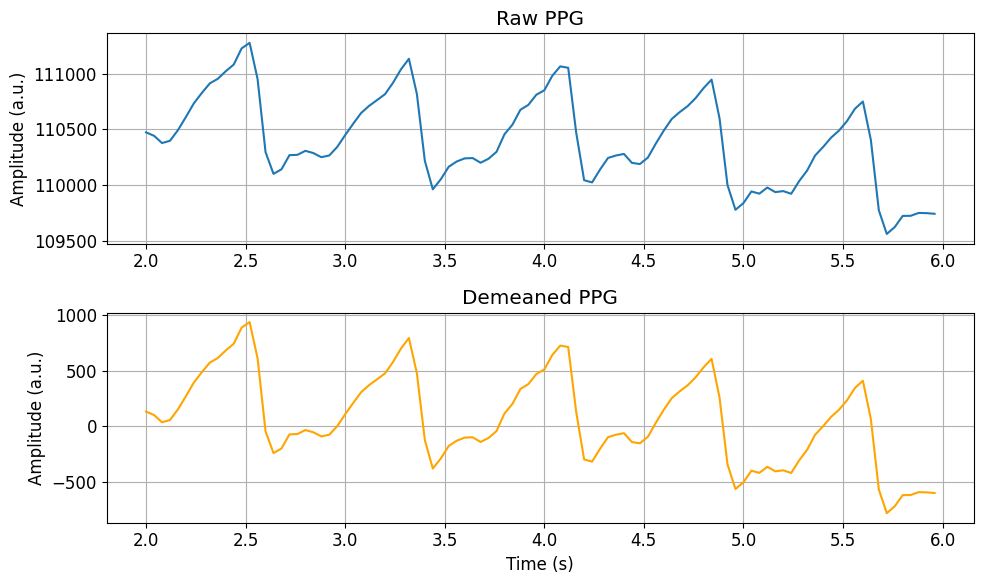

In [13]:
# Lets verify visually
plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.plot(t[start_idx:end_idx], ppg_red_raw[start_idx:end_idx])
plt.title("Raw PPG")
plt.ylabel("Amplitude (a.u.)")
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(t[start_idx:end_idx], ppg_red_demean[start_idx:end_idx], color='orange')
plt.title("Demeaned PPG")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (a.u.)")
plt.grid(True)

plt.tight_layout()
plt.show()

In [14]:
# Step 3.2 Detrending
#ppg_ir_for_detrend = ppg_ir_demean.copy() 
ppg_red_for_detrend = ppg_red_demean.copy()
from scipy.signal import detrend
#ppg_ir_detrend = detrend(ppg_ir_for_detrend, type='linear')# Removes slow linear drift
ppg_red_detrend = detrend(ppg_red_for_detrend, type='linear')
print("Mean after detrending:",np.mean(ppg_red_detrend))

Mean after detrending: 2.593338306260157e-13


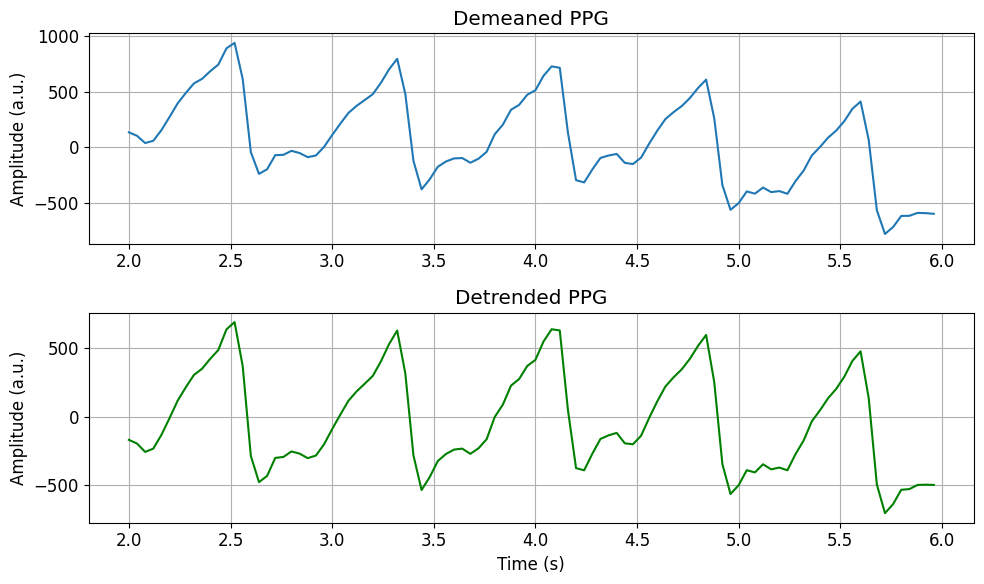

In [15]:
# Visualize the effect
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t[start_idx:end_idx], ppg_red_demean[start_idx:end_idx])
plt.title("Demeaned PPG")
plt.ylabel("Amplitude (a.u.)")
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(t[start_idx:end_idx], ppg_red_detrend[start_idx:end_idx], color='green')
plt.title("Detrended PPG")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (a.u.)")
plt.grid(True)

plt.tight_layout()
plt.show()

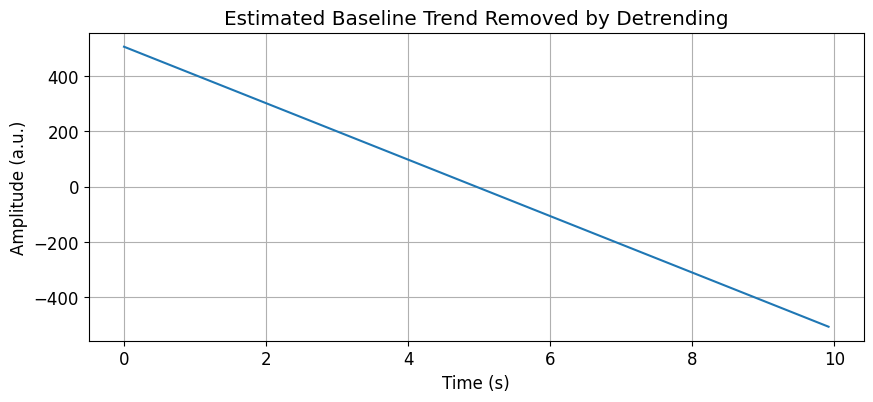

In [16]:
# Visualize removed trend
trend = ppg_red_for_detrend - ppg_red_detrend
plt.plot(t, trend)
plt.title("Estimated Baseline Trend Removed by Detrending")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (a.u.)")
plt.grid(True)
plt.show()

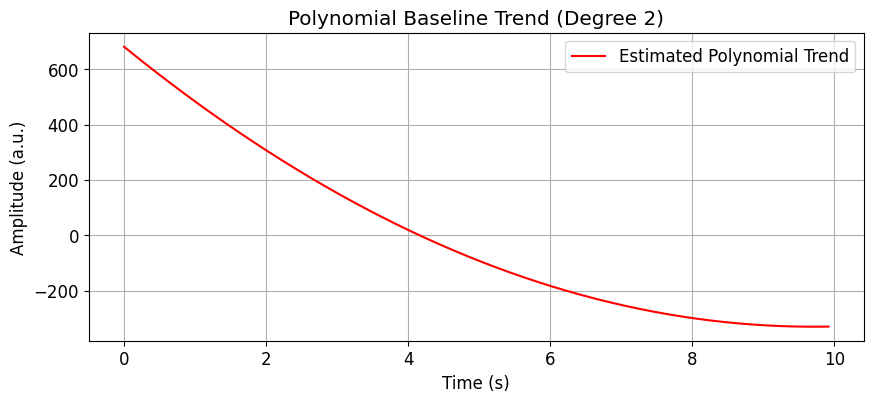

In [17]:
# Step 3.2.2. Polynomial detrending
#ppg_sig = ppg_ir_demean.copy()
ppg_sig1 = ppg_red_demean.copy()
fs = 25
t = np.arange(len(ppg_sig1)) / fs
# Fit a polynomial detrend
deg = 2  # quadratic baseline
#coeffs = np.polyfit(t, ppg_sig, deg) # estimates polynomial coefficients
#trend = np.polyval(coeffs, t) # evaluates baseline trend at each time point
coeffs1 = np.polyfit(t, ppg_sig1, deg) # for red signal
trend1 = np.polyval(coeffs1, t)
#ppg_poly_detrend = ppg_sig - trend # Substract the trend
ppg_poly_detrend1 = ppg_sig1 - trend1; # Substract the trend
plt.figure(figsize=(10,4))
plt.plot(t, trend1, label="Estimated Polynomial Trend", color='red')
plt.title("Polynomial Baseline Trend (Degree 2)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (a.u.)")
plt.grid(True)
plt.legend()
plt.show()

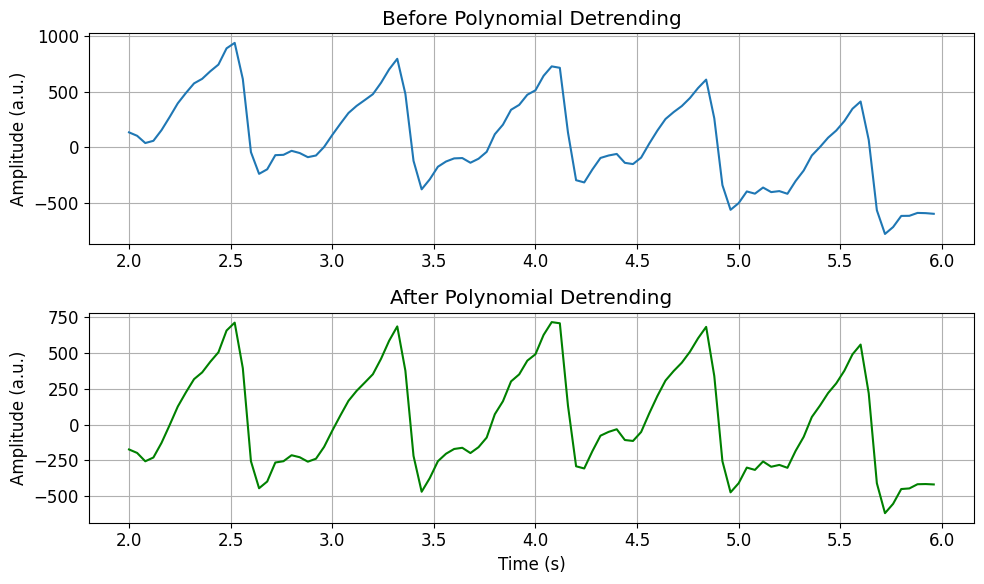

In [18]:
# Compare before and after detrend
start_time = 2
end_time = 6
start_idx = int(start_time * fs)
end_idx   = int(end_time * fs)

plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.plot(t[start_idx:end_idx], ppg_sig1[start_idx:end_idx])
plt.title("Before Polynomial Detrending")
plt.ylabel("Amplitude (a.u.)")
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(t[start_idx:end_idx], ppg_poly_detrend1[start_idx:end_idx], color='green')
plt.title("After Polynomial Detrending")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (a.u.)")
plt.grid(True)

plt.tight_layout()
plt.show()


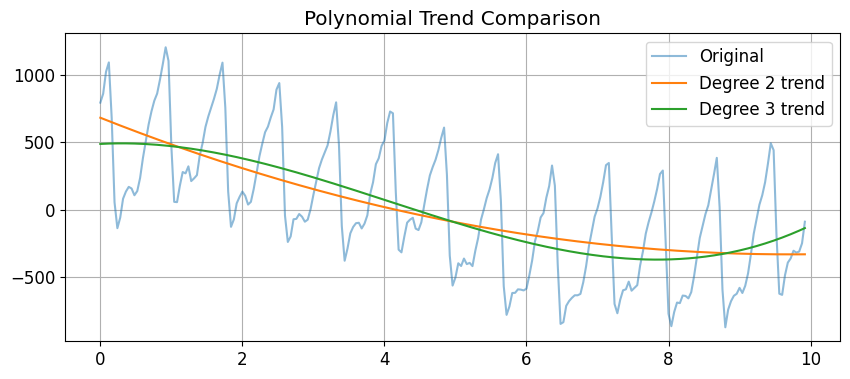

In [19]:
# Degree 2
trend2 = np.polyval(np.polyfit(t, ppg_sig1, 2), t)
ppg_deg2 = ppg_sig1 - trend2

# Degree 3
trend3 = np.polyval(np.polyfit(t, ppg_sig1, 3), t)
ppg_deg3 = ppg_sig1 - trend3

plt.figure(figsize=(10,4))
plt.plot(t, ppg_sig1, label='Original', alpha=0.5)
plt.plot(t, trend2, label='Degree 2 trend')
plt.plot(t, trend3, label='Degree 3 trend')
plt.legend()
plt.title("Polynomial Trend Comparison")
plt.grid(True)
plt.show()


0.04 0.32


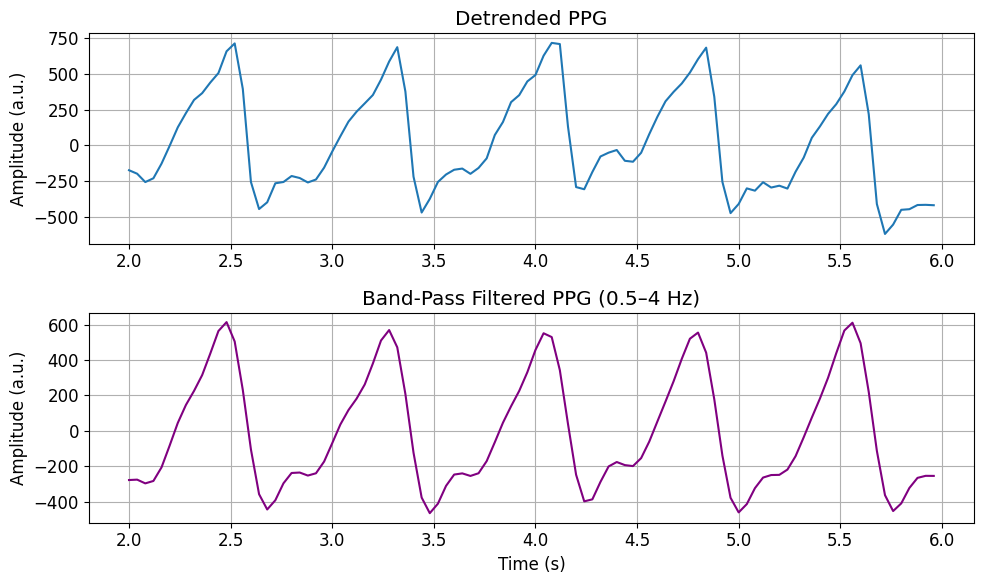

In [20]:
# step 3.3 Band pass filtereing
lowcut = 0.5   # Hz Define the range, idle for cardiac
highcut = 4.0  # Hz
nyq = fs / 2

low = lowcut / nyq # define the normalized frequencies
high = highcut / nyq

print(low, high) # print normalized frequencies
# Design butterworth bandpass filter
from scipy.signal import butter, filtfilt
order = 3  # safe for PPG
b, a = butter(order, [low, high], btype='bandpass')
# Apply zero-phase filtering
#ppg_ir_bpf = filtfilt(b, a, ppg_poly_detrend)
ppg_red_bpf = filtfilt(b, a, ppg_poly_detrend1)
# Visualize the difference
start_time = 2
end_time = 6

start_idx = int(start_time * fs)
end_idx   = int(end_time * fs)

t = np.arange(len(ppg_red_bpf)) / fs

plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.plot(t[start_idx:end_idx], ppg_poly_detrend1[start_idx:end_idx])
plt.title("Detrended PPG")
plt.ylabel("Amplitude (a.u.)")
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(t[start_idx:end_idx], ppg_red_bpf[start_idx:end_idx], color='purple')
plt.title("Band-Pass Filtered PPG (0.5–4 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (a.u.)")
plt.grid(True)

plt.tight_layout()
plt.show()


In [21]:
# STEP 4. Start feature extraction
# Start with peakdetector
from scipy.signal import find_peaks
# Minimum distance between peaks (in samples)
# 0.4 s → max HR ≈ 150 bpm
min_distance = int(0.45 * fs)
peaks, properties = find_peaks(
    ppg_red_bpf,
    distance=min_distance
)
print("Number of detected beats:", len(peaks))


Number of detected beats: 13


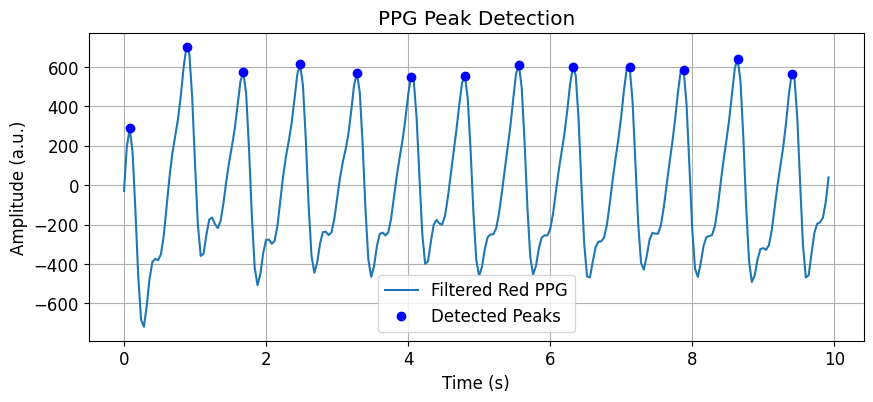

In [22]:
# Visual verifications
plt.figure(figsize=(10,4))
plt.plot(t, ppg_red_bpf, label='Filtered Red PPG')
plt.plot(t[peaks], ppg_red_bpf[peaks], 'bo', label='Detected Peaks')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (a.u.)")
plt.title("PPG Peak Detection")
plt.legend()
plt.grid(True)
plt.show()


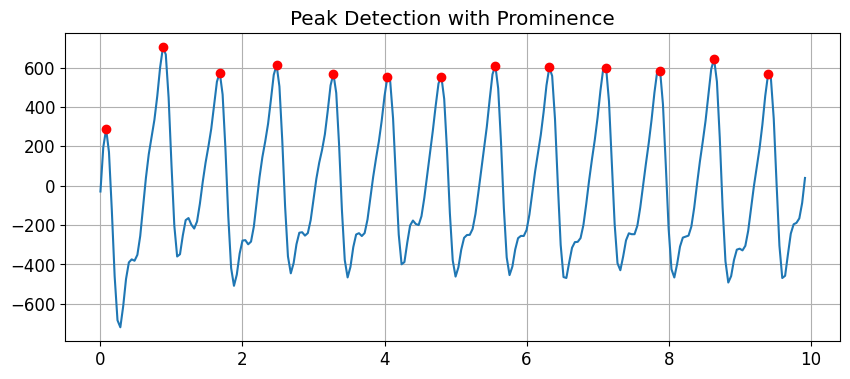

In [23]:
# there are 2 ways to define the findpeak()
# step 1. Using prominance
peaks, properties = find_peaks(
    ppg_red_bpf,
    distance=int(0.4 * fs),
    prominence=0.1 * np.std(ppg_red_bpf)
)
plt.figure(figsize=(10,4))
plt.plot(t, ppg_red_bpf)
plt.plot(t[peaks], ppg_red_bpf[peaks], 'ro')
plt.title("Peak Detection with Prominence")
plt.grid(True)
plt.show()


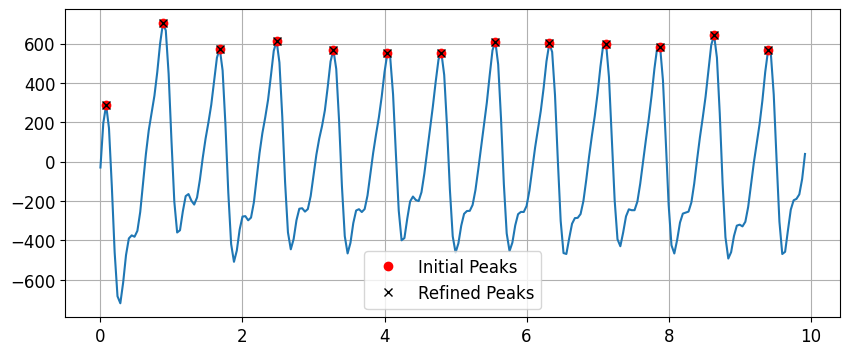

In [24]:
# Refine peak position locally
# After finding approximate peaks, search locally for the true maximum.
refined_peaks = []
search_window = int(0.1 * fs)  # ±100 ms

for p in peaks:
    start = max(p - search_window, 0)
    end   = min(p + search_window, len(ppg_red_bpf))
    local_max = np.argmax(ppg_red_bpf[start:end]) + start
    refined_peaks.append(local_max)

refined_peaks = np.array(refined_peaks)

# Visualize that
plt.figure(figsize=(10,4))
plt.plot(t, ppg_red_bpf)
plt.plot(t[peaks], ppg_red_bpf[peaks], 'ro', label='Initial Peaks')
plt.plot(t[refined_peaks], ppg_red_bpf[refined_peaks], 'kx', label='Refined Peaks')
plt.legend()
plt.grid(True)
plt.show()


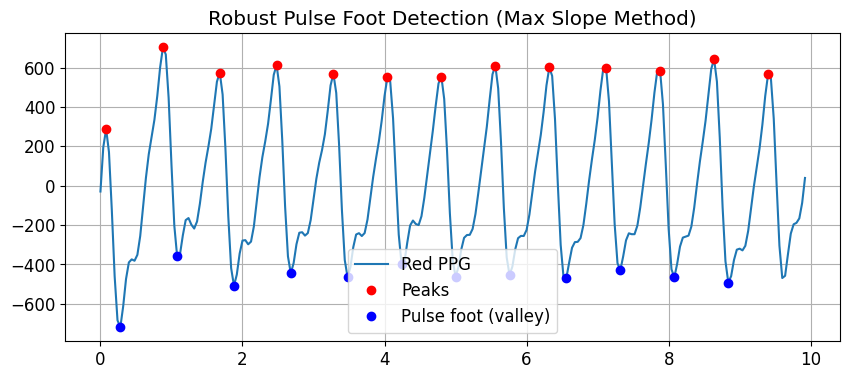

In [25]:
# Detect valleys 
valleys = []

search_window = int(0.6 * fs)  # 600 ms before peak

for p in refined_peaks:
    start = max(p - search_window, 0)
    segment = ppg_red_bpf[start:p]

    if len(segment) < 6:
        valleys.append(np.nan)
        continue

    # First derivative (slope)
    d1 = np.diff(segment)

    # Point of maximum upstroke
    max_slope_idx = np.argmax(d1)

    # Search for minimum BEFORE max slope
    foot_segment = segment[:max_slope_idx+1]

    valley_idx = np.argmin(foot_segment)
    valleys.append(start + valley_idx)

valleys = np.array(valleys)

# Visual verifications
valid_v = ~np.isnan(valleys)

plt.figure(figsize=(10,4))
plt.plot(t, ppg_red_bpf, label="Red PPG")
plt.plot(t[refined_peaks], ppg_red_bpf[refined_peaks], 'ro', label="Peaks")
plt.plot(t[valleys[valid_v].astype(int)],
         ppg_red_bpf[valleys[valid_v].astype(int)],
         'bo', label="Pulse foot (valley)")
plt.legend()
plt.grid(True)
plt.title("Robust Pulse Foot Detection (Max Slope Method)")
plt.show()


In [36]:
# Detection of dicrotic notches
ppg_red_lp = ppg_red_bpf #change this if low pass filtered ppg is designed

dicrotic_notches = []

for i in range(len(valleys)):
    v = valleys[i]
    p = refined_peaks[i]

    # Skip invalid beats
    if np.isnan(v) or np.isnan(p):
        dicrotic_notches.append(np.nan)
        continue

    v = int(v)
    p = int(p)

    if p <= v:
        dicrotic_notches.append(np.nan)
        continue

    segment = ppg_red_lp[v:p]   # now SAFE

    if len(segment) < 6:
        dicrotic_notches.append(np.nan)
        continue

    d1 = np.diff(segment)

    candidates = np.where((d1[:-1] < 0) & (d1[1:] > 0))[0]

    if len(candidates) == 0:
        dicrotic_notches.append(np.nan)
    else:
        notch_idx = v + candidates[0]
        dicrotic_notches.append(notch_idx)

dicrotic_notches = np.array(dicrotic_notches)


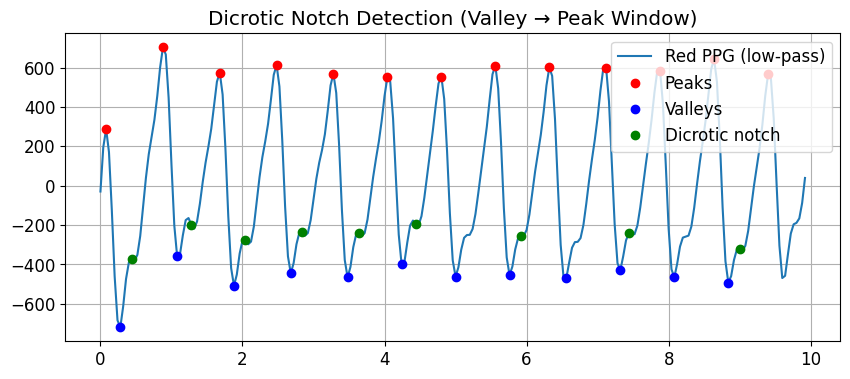

In [37]:
valid_n = ~np.isnan(dicrotic_notches)

plt.figure(figsize=(10,4))
plt.plot(t, ppg_red_lp, label="Red PPG (low-pass)")
plt.plot(t[refined_peaks.astype(int)],
         ppg_red_lp[refined_peaks.astype(int)],
         'ro', label="Peaks")
plt.plot(t[valleys[~np.isnan(valleys)].astype(int)],
         ppg_red_lp[valleys[~np.isnan(valleys)].astype(int)],
         'bo', label="Valleys")
plt.plot(t[dicrotic_notches[valid_n].astype(int)],
         ppg_red_lp[dicrotic_notches[valid_n].astype(int)],
         'go', label="Dicrotic notch")

plt.legend()
plt.grid(True)
plt.title("Dicrotic Notch Detection (Valley → Peak Window)")
plt.show()


In [38]:
# Refinement of peaks, valley and dicrotic noteches
valid = (
    ~np.isnan(valleys) &
    ~np.isnan(refined_peaks) &
    ~np.isnan(dicrotic_notches)
)

peaks_v   = refined_peaks[valid].astype(int)
valleys_v = valleys[valid].astype(int)
notches_v = dicrotic_notches[valid].astype(int)


In [42]:
# STEP 5. features list
# 5.1  Time Domain features
pulse_amplitude = ppg_red_lp[peaks_v] - ppg_red_lp[valleys_v] # Peripheral perfusion/ Vasoconstriction / dilation
rise_time = (peaks_v - valleys_v) / fs   # seconds Arterial stiffness / Vascular compliance
notch_time = (notches_v - valleys_v) / fs # Timing of wave reflection / Valve closure dynamics
peak_notch_delay = (peaks_v - notches_v) / fs #Shape of systolic upstroke / Reflection interaction
AUP = []

for v, p in zip(valleys_v, peaks_v):
    area = np.trapezoid(ppg_red_lp[v:p])
    AUP.append(abs(area))

AUP = np.array(AUP)

RI = (
    (ppg_red_lp[notches_v] - ppg_red_lp[valleys_v]) /
    (ppg_red_lp[peaks_v]   - ppg_red_lp[valleys_v])
) # Strength of reflected wave/  Arterial stiffness indicator

# Pulse width, how long a pulse stays open, Vascular compliance/ Blood pressure trend
pulse_width = []

for v, p in zip(valleys_v, peaks_v):
    half_amp = ppg_red_lp[v] + 0.5 * (ppg_red_lp[p] - ppg_red_lp[v])
    segment = ppg_red_lp[v:p]

    idx = np.where(segment >= half_amp)[0]
    if len(idx) > 0:
        pulse_width.append(idx[-1] / fs)

pulse_width = np.array(pulse_width)

IBI = np.diff(peaks_v) / fs # Beat to beat heart rate
HR  = 60 / IBI


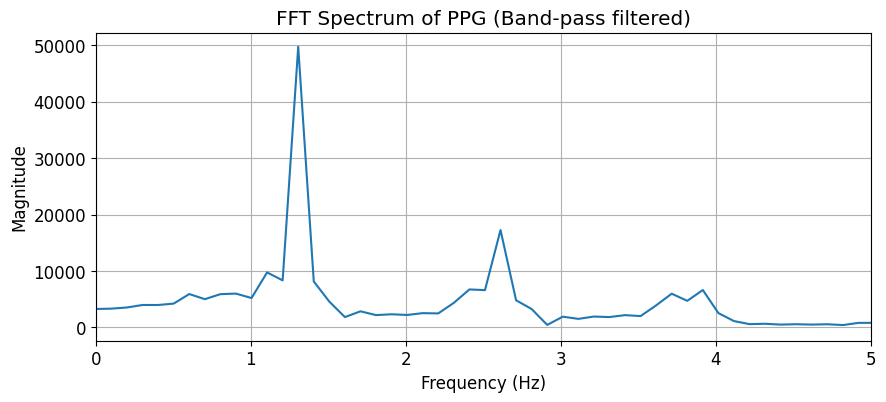

In [43]:
# 5.2 Frequency domain features
N = len(ppg_red_bpf)
fft_vals = np.fft.fft(ppg_red_bpf)
freqs = np.fft.fftfreq(N, d=1/fs)
pos_mask = freqs >= 0  # Keep only positive frequencies
freqs_pos = freqs[pos_mask]
fft_mag = np.abs(fft_vals[pos_mask])
# Visualize that 
plt.figure(figsize=(10,4))
plt.plot(freqs_pos, fft_mag)
plt.xlim(0, 5)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("FFT Spectrum of PPG (Band-pass filtered)")
plt.grid(True)
plt.show()

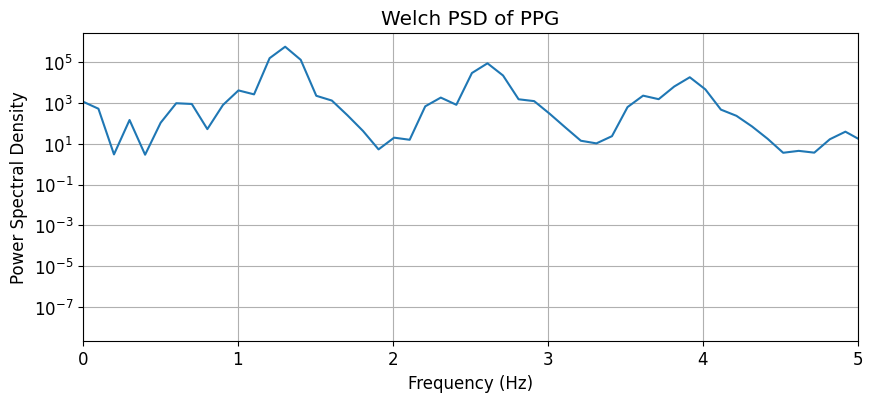

In [44]:
# Compute Welch Method
from scipy.signal import welch

f_welch, psd = welch(
    ppg_red_bpf,
    fs=fs,
    window='hann',
    nperseg=min(256, len(ppg_red_bpf)),
    noverlap=None,
    scaling='density'
)
# Visualize that
plt.figure(figsize=(10,4))
plt.semilogy(f_welch, psd)  # log scale for power
plt.xlim(0, 5)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.title("Welch PSD of PPG")
plt.grid(True)
plt.show()


In [46]:
# Extract the frquency based features
cardiac_band = (0.5, 4.0)
idx_peak = np.argmax(psd) 
dominant_freq = f_welch[idx_peak] # Define dominant frequancy
HR_spectral = dominant_freq * 60
# Cardiac power band
band_mask = (f_welch >= cardiac_band[0]) & (f_welch <= cardiac_band[1])
cardiac_power = np.trapezoid(psd[band_mask], f_welch[band_mask])

# Normalized cardiac power
total_power = np.trapezoid(psd, f_welch)
norm_cardiac_power = cardiac_power / total_power
spectral_centroid = np.sum(f_welch * psd) / np.sum(psd) # Higher centroid → faster pulses / sharper waveform
spectral_bandwidth = np.sqrt(
    np.sum(((f_welch - spectral_centroid)**2) * psd) / np.sum(psd)
) # More variability → broader bandwidth
psd_norm = psd / np.sum(psd)
spectral_entropy = -np.sum(psd_norm * np.log2(psd_norm + 1e-12))


In [47]:
features = {
    "mean_pulse_amplitude": np.mean(pulse_amplitude),
    "std_pulse_amplitude":  np.std(pulse_amplitude),

    "mean_rise_time_s": np.mean(rise_time),
    "mean_notch_time_s": np.mean(notch_time),
    "mean_peak_notch_delay_s": np.mean(peak_notch_delay),

    "mean_RI": np.mean(RI),

    "mean_pulse_width_s": np.mean(pulse_width),
    "mean_AUP": np.mean(AUP),

    "mean_HR_bpm": np.mean(HR),
    "HR_std": np.std(HR),
    "dominant_frequency_hz": dominant_freq,
    "spectral_HR_bpm": HR_spectral,

    "cardiac_band_power": cardiac_power,
    "normalized_cardiac_power": norm_cardiac_power,

    "spectral_centroid_hz": spectral_centroid,
    "spectral_bandwidth_hz": spectral_bandwidth,

    "spectral_entropy": spectral_entropy
}

features


{'mean_pulse_amplitude': np.float64(1065.133720510879),
 'std_pulse_amplitude': np.float64(136.78563475402694),
 'mean_rise_time_s': np.float64(0.577777777777778),
 'mean_notch_time_s': np.float64(0.16444444444444442),
 'mean_peak_notch_delay_s': np.float64(0.41333333333333333),
 'mean_RI': np.float64(0.20009974825222562),
 'mean_pulse_width_s': np.float64(0.5377777777777778),
 'mean_AUP': np.float64(1054.2475264106642),
 'mean_HR_bpm': np.float64(62.53795546558704),
 'HR_std': np.float64(18.193544190955347),
 'dominant_frequency_hz': np.float64(1.3052208835341363),
 'spectral_HR_bpm': np.float64(78.31325301204818),
 'cardiac_band_power': np.float64(106467.5067961099),
 'normalized_cardiac_power': np.float64(0.9847702122960736),
 'spectral_centroid_hz': np.float64(1.5627009514573993),
 'spectral_bandwidth_hz': np.float64(0.6287944294121794),
 'spectral_entropy': np.float64(2.2445726084933293)}

In [48]:
print("Time-domain HR (mean):", np.mean(HR))
print("Spectral HR:", HR_spectral)


Time-domain HR (mean): 62.53795546558704
Spectral HR: 78.31325301204818


In [49]:
feature_table = pd.DataFrame([features])
feature_table = feature_table.round(3) # limit digits after decimal upto 3 
feature_table.to_csv("ppg_features_subject01.csv", index=False)
